<a href="https://colab.research.google.com/github/swathise/ew30050-classwork3/blob/main/task_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/student_data.csv"
df = pd.read_csv(file_path)

# Display column names
print(df.columns)




Index(['Hours_Studied', 'Review_Session', 'Results'], dtype='object')


   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


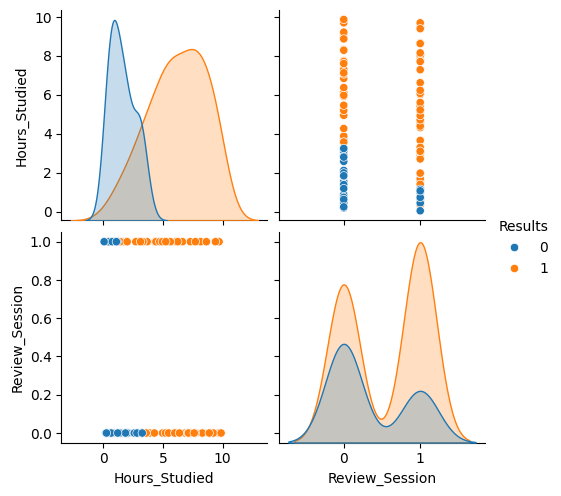

Intercept: [-4.61373892]
Coefficients: [[1.36542016 1.87797591]]
Accuracy: 0.93
AUC: 0.9761029411764706


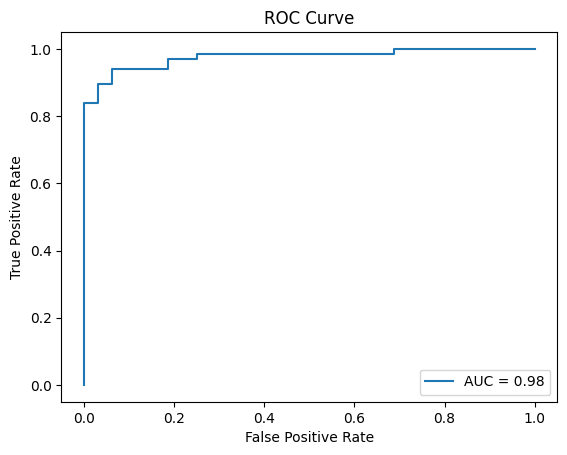

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
file_path = "/content/student_data.csv"
df = pd.read_csv(file_path)

# Check dataset
print(df.head())

# Visualize data
sns.pairplot(df, hue='Results')
plt.show()

# Separate features and target
X = df.drop(columns=['Results'])
y = df['Results']

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Get model coefficients
print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)

# Predictions
y_pred = log_reg.predict(X)
y_prob = log_reg.predict_proba(X)[:, 1]

# Model performance
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
print("Accuracy:", accuracy)
print("AUC:", auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

